Task implemented-

1. Features normalization based on Sklearn's MinMaxScaler and Standard scaler
2. Feature selection based on sklearn's RFE,SelectKBest, Randomforest, SelectFromModel
3. Correlation map

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [15]:
features_imp_full = ['voltage__c3__lag_1', 'voltage__abs_energy', 'voltage__sample_entropy', 'voltage__approximate_entropy__m_2__r_0.1', 'voltage__approximate_entropy__m_2__r_0.3', 'voltage__approximate_entropy__m_2__r_0.5', 'voltage__approximate_entropy__m_2__r_0.7','voltage__matrix_profile__feature_"min"__threshold_0.98' ,   'voltage__matrix_profile__feature_"25"__threshold_0.98', 'voltage__benford_correlation', 'voltage__cid_ce__normalize_False','voltage__kurtosis', 'voltage__skewness','voltage__sum_values', 'voltage__root_mean_square', 'voltage__mean_abs_change', 'voltage__mean' , 'voltage__number_cwt_peaks__n_5','voltage__variance', 'voltage__variation_coefficient', 'max_value', 'welding speed', 'target']
# print(len(features_imp))

features_imp = ['voltage__abs_energy', 'voltage__sample_entropy', 'voltage__approximate_entropy__m_2__r_0.1','voltage__matrix_profile__feature_"min"__threshold_0.98' ,   'voltage__matrix_profile__feature_"25"__threshold_0.98', 'voltage__benford_correlation', 'voltage__cid_ce__normalize_False','voltage__kurtosis', 'voltage__sum_values',  'voltage__mean_abs_change', 'voltage__number_cwt_peaks__n_5','voltage__variance', 'max_value', 'welding speed', 'target']



0 voltage__abs_energy
1 voltage__sample_entropy
2 voltage__approximate_entropy__m_2__r_0.1
3 voltage__matrix_profile__feature_"min"__threshold_0.98
4 voltage__matrix_profile__feature_"25"__threshold_0.98
5 voltage__benford_correlation
6 voltage__cid_ce__normalize_False
7 voltage__kurtosis
8 voltage__sum_values
9 voltage__mean_abs_change
10 voltage__number_cwt_peaks__n_5
11 voltage__variance
12 max_value
13 welding speed
14 target
full feature list
0 voltage__c3__lag_1
1 voltage__abs_energy
2 voltage__sample_entropy
3 voltage__approximate_entropy__m_2__r_0.1
4 voltage__approximate_entropy__m_2__r_0.3
5 voltage__approximate_entropy__m_2__r_0.5
6 voltage__approximate_entropy__m_2__r_0.7
7 voltage__matrix_profile__feature_"min"__threshold_0.98
8 voltage__matrix_profile__feature_"25"__threshold_0.98
9 voltage__benford_correlation
10 voltage__cid_ce__normalize_False
11 voltage__kurtosis
12 voltage__skewness
13 voltage__sum_values
14 voltage__root_mean_square
15 voltage__mean_abs_change
16 vo

In [16]:
data_file1 = r'path1'


def data_preparation(data_file):

    data_1sec = pd.read_excel(data_file)

    data_1sec = data_1sec[(data_1sec['layer_no'] > 3) & (data_1sec['layer_no'] < 51)]

    data_1sec['target'] = 0

    list_non_anomolic = list(range(4,47))
    list_anomolic = [47, 48, 49, 50]
    for i, row in data_1sec.iterrows():
        data_5= data_1sec['layer_no'].loc[i]
        if data_5 in list_non_anomolic:
            data_1sec.at[i,'target']= 1
        else:
            data_1sec.at[i,'target']= 0

    return data_1sec


In [17]:
data_1 = data_preparation(data_file1)
y = data_1['target']
data_2 = data_1[features_imp]
data_3 = data_1[features_imp_full]

In [18]:

def type_normalization(normalization=True, standarization= False, features = features_imp, data_frame = data_2):
    if normalization:
        print('+++++++++   Normalization  +++++++++++')
        min_max_scaler = MinMaxScaler()
        normalized_data_non_anomolus = min_max_scaler.fit_transform(data_frame[features])
        return normalized_data_non_anomolus
    
    elif standarization:
        scaler = StandardScaler()
        print('+++++++++   Standarization  +++++++++++')
        normalized_data_non_anomolus = scaler.fit_transform(data_frame[features])
        return normalized_data_non_anomolus

voltage__variance                                        -0.792010
max_value                                                -0.720573
voltage__abs_energy                                      -0.575464
voltage__mean_abs_change                                 -0.489807
voltage__approximate_entropy__m_2__r_0.1                 -0.432598
voltage__sum_values                                      -0.358598
voltage__cid_ce__normalize_False                         -0.326744
voltage__sample_entropy                                  -0.321589
voltage__kurtosis                                        -0.225686
voltage__number_cwt_peaks__n_5                           -0.057303
voltage__matrix_profile__feature_"min"__threshold_0.98    0.176748
voltage__matrix_profile__feature_"25"__threshold_0.98     0.227204
voltage__benford_correlation                              0.488507
target                                                    1.000000
welding speed                                                 

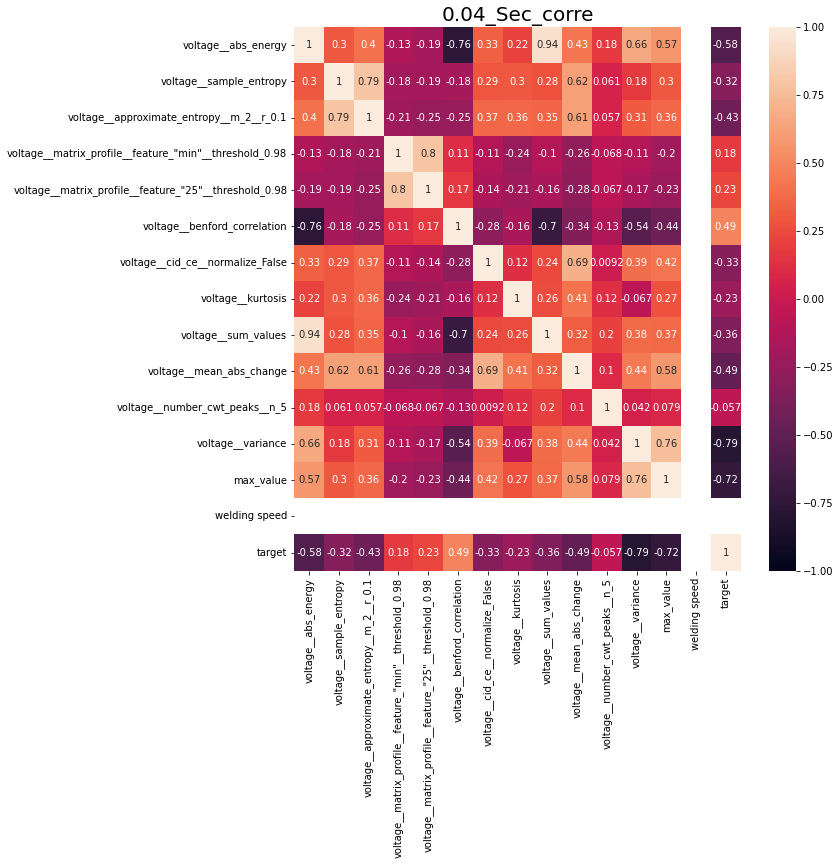

In [19]:

fig, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(data_2.corr(), vmin=-1, vmax=1, annot=True)
plt.title("0.04_Sec_corre", fontsize =20)
corr_label = data_2.corr()['target'][:].sort_values()
print(corr_label)

In [20]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
normalized_data_non_anomolus = type_normalization(normalization=True, standarization= False, features=features_imp, data_frame = data_2)
normalized_data_non_anomolus = pd.DataFrame(normalized_data_non_anomolus, columns = data_2.columns)
normalized_data_non_anomolus = normalized_data_non_anomolus.drop(columns='target')
X_train, X_test, y_train, y_test = train_test_split(normalized_data_non_anomolus, y, test_size=0.01, random_state=42, shuffle=True)
svc = SVC(kernel="linear", C=1)
selector = RFE(estimator=svc, n_features_to_select= 5)
selector.fit(X_train,y_train)
normalized_data_non_anomolus[normalized_data_non_anomolus.columns[selector.get_support(indices=True)]]

+++++++++   Normalization  +++++++++++


,voltage__abs_energy,voltage__approximate_entropy__m_2__r_0.1,voltage__kurtosis,voltage__sum_values,voltage__variance
0,0.351972,0.294017,0.148123,0.529616,0.222107
1,0.349908,0.126129,0.151370,0.535913,0.206078
2,0.167693,0.183124,0.109236,0.322099,0.156533
3,0.312250,0.257934,0.167345,0.503014,0.177921
4,0.269105,0.248357,0.087179,0.443440,0.191976
...,...,...,...,...,...
14068,0.332561,0.016628,0.226010,0.355351,0.473087
14069,0.754986,0.361642,0.173696,0.823532,0.533995
14070,0.555189,0.446669,0.089207,0.580601,0.583831
14071,0.634470,0.681805,0.200005,0.715017,0.495527


In [21]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
selector2 = SelectKBest(mutual_info_classif, k=4)
selector2.fit(X_train,y_train)
normalized_data_non_anomolus[normalized_data_non_anomolus.columns[selector.get_support(indices=True)]]

,voltage__abs_energy,voltage__approximate_entropy__m_2__r_0.1,voltage__kurtosis,voltage__sum_values,voltage__variance
0,0.351972,0.294017,0.148123,0.529616,0.222107
1,0.349908,0.126129,0.151370,0.535913,0.206078
2,0.167693,0.183124,0.109236,0.322099,0.156533
3,0.312250,0.257934,0.167345,0.503014,0.177921
4,0.269105,0.248357,0.087179,0.443440,0.191976
...,...,...,...,...,...
14068,0.332561,0.016628,0.226010,0.355351,0.473087
14069,0.754986,0.361642,0.173696,0.823532,0.533995
14070,0.555189,0.446669,0.089207,0.580601,0.583831
14071,0.634470,0.681805,0.200005,0.715017,0.495527


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
selector3 = SelectFromModel(clf)
selector3.fit(X_train,y_train)
normalized_data_non_anomolus[normalized_data_non_anomolus.columns[selector.get_support(indices=True)]]

,voltage__abs_energy,voltage__approximate_entropy__m_2__r_0.1,voltage__kurtosis,voltage__sum_values,voltage__variance
0,0.351972,0.294017,0.148123,0.529616,0.222107
1,0.349908,0.126129,0.151370,0.535913,0.206078
2,0.167693,0.183124,0.109236,0.322099,0.156533
3,0.312250,0.257934,0.167345,0.503014,0.177921
4,0.269105,0.248357,0.087179,0.443440,0.191976
...,...,...,...,...,...
14068,0.332561,0.016628,0.226010,0.355351,0.473087
14069,0.754986,0.361642,0.173696,0.823532,0.533995
14070,0.555189,0.446669,0.089207,0.580601,0.583831
14071,0.634470,0.681805,0.200005,0.715017,0.495527


In [23]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
normalized_data_non_anomolus = type_normalization(normalization=True, standarization= False, features=features_imp_full, data_frame = data_3)
normalized_data_non_anomolus = pd.DataFrame(normalized_data_non_anomolus, columns = data_3.columns)
normalized_data_non_anomolus = normalized_data_non_anomolus.drop(columns='target')
normalized_data_non_anomolus.head()

+++++++++   Normalization  +++++++++++


,voltage__c3__lag_1,voltage__abs_energy,voltage__sample_entropy,voltage__approximate_entropy__m_2__r_0.1,voltage__approximate_entropy__m_2__r_0.3,voltage__approximate_entropy__m_2__r_0.5,voltage__approximate_entropy__m_2__r_0.7,"voltage__matrix_profile__feature_""min""__threshold_0.98","voltage__matrix_profile__feature_""25""__threshold_0.98",voltage__benford_correlation,...,voltage__skewness,voltage__sum_values,voltage__root_mean_square,voltage__mean_abs_change,voltage__mean,voltage__number_cwt_peaks__n_5,voltage__variance,voltage__variation_coefficient,max_value,welding speed
0,0.200068,0.351972,0.304417,0.294017,0.280415,0.343784,0.244206,0.140211,0.350731,0.852917,...,0.347878,0.529616,0.372246,0.426103,0.485296,0.1875,0.222107,0.383400,0.097367,0.0
1,0.201479,0.349908,0.138000,0.126129,0.184559,0.218758,0.289060,0.219437,0.214947,0.879410,...,0.356499,0.535913,0.370119,0.123584,0.492356,0.3750,0.206078,0.362758,0.061849,0.0
2,0.069935,0.167693,0.334276,0.183124,0.344360,0.448780,0.283844,0.173619,0.116459,0.827965,...,0.590207,0.322099,0.171242,0.321873,0.252662,0.3125,0.156533,0.554767,0.043784,0.0
3,0.169261,0.312250,0.295560,0.257934,0.317253,0.325899,0.386437,0.252046,0.713901,0.550735,...,0.319877,0.503014,0.336375,0.268767,0.464764,0.6250,0.177921,0.360855,0.043172,0.0
4,0.134138,0.269105,0.316213,0.248357,0.194336,0.202370,0.146432,0.361972,0.786072,0.656619,...,0.412411,0.443440,0.274144,0.208628,0.371272,0.4375,0.191976,0.462663,0.038579,0.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data_non_anomolus, y, test_size=0.01, random_state=42, shuffle=True)
svc = SVC(kernel="linear", C=1)
selector = RFE(estimator=svc, n_features_to_select= 5)
selector.fit(X_train,y_train)
normalized_data_non_anomolus[normalized_data_non_anomolus.columns[selector.get_support(indices=True)]]

,voltage__c3__lag_1,voltage__kurtosis,voltage__skewness,voltage__root_mean_square,voltage__variance
0,0.200068,0.148123,0.347878,0.372246,0.222107
1,0.201479,0.151370,0.356499,0.370119,0.206078
2,0.069935,0.109236,0.590207,0.171242,0.156533
3,0.169261,0.167345,0.319877,0.336375,0.177921
4,0.134138,0.087179,0.412411,0.274144,0.191976
...,...,...,...,...,...
14068,0.256974,0.226010,0.827170,0.346595,0.473087
14069,0.611894,0.173696,0.331406,0.748426,0.533995
14070,0.457060,0.089207,0.631358,0.564531,0.583831
14071,0.498667,0.200005,0.452511,0.643066,0.495527


In [25]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
selector2 = SelectKBest(mutual_info_classif, k=4)
selector2.fit(X_train,y_train)
normalized_data_non_anomolus[normalized_data_non_anomolus.columns[selector.get_support(indices=True)]]

,voltage__c3__lag_1,voltage__kurtosis,voltage__skewness,voltage__root_mean_square,voltage__variance
0,0.200068,0.148123,0.347878,0.372246,0.222107
1,0.201479,0.151370,0.356499,0.370119,0.206078
2,0.069935,0.109236,0.590207,0.171242,0.156533
3,0.169261,0.167345,0.319877,0.336375,0.177921
4,0.134138,0.087179,0.412411,0.274144,0.191976
...,...,...,...,...,...
14068,0.256974,0.226010,0.827170,0.346595,0.473087
14069,0.611894,0.173696,0.331406,0.748426,0.533995
14070,0.457060,0.089207,0.631358,0.564531,0.583831
14071,0.498667,0.200005,0.452511,0.643066,0.495527


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
selector3 = SelectFromModel(clf)
selector3.fit(X_train,y_train)
normalized_data_non_anomolus[normalized_data_non_anomolus.columns[selector.get_support(indices=True)]]

,voltage__c3__lag_1,voltage__kurtosis,voltage__skewness,voltage__root_mean_square,voltage__variance
0,0.200068,0.148123,0.347878,0.372246,0.222107
1,0.201479,0.151370,0.356499,0.370119,0.206078
2,0.069935,0.109236,0.590207,0.171242,0.156533
3,0.169261,0.167345,0.319877,0.336375,0.177921
4,0.134138,0.087179,0.412411,0.274144,0.191976
...,...,...,...,...,...
14068,0.256974,0.226010,0.827170,0.346595,0.473087
14069,0.611894,0.173696,0.331406,0.748426,0.533995
14070,0.457060,0.089207,0.631358,0.564531,0.583831
14071,0.498667,0.200005,0.452511,0.643066,0.495527
